reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

vote - helpful votes of the review

style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

image - images that users post after they have received the product

In [6]:
# Manipulación de datos
import pandas as pd
import numpy as np
from google.colab import files
from google.colab import drive
import os
import json
import gzip
from urllib.request import urlopen
import io

# Visualización de datos
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [7]:
# Verificación entorno de alta capacidad de RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [8]:
pip install pandas openpyxl

In [11]:
#drive.mount('/content/drive')
!gdown '1ChzYRhSgS7ufpUR5qTGF1jIoNt5lM5Rx'

Downloading...
From: https://drive.google.com/uc?id=1ChzYRhSgS7ufpUR5qTGF1jIoNt5lM5Rx
To: /content/DataFinal_Amazon.csv
100% 1.25G/1.25G [00:11<00:00, 109MB/s]


In [14]:
### Carga de la data

data = pd.read_csv('DataFinal_Amazon.csv')

<ipython-input-14-72eeba2c292e>:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('DataFinal_Amazon.csv')


In [15]:
# Longitud total de la lista, este numero equivale al numero total de productos
print(len(data))

4800571


In [16]:
data.head(5)

,overall,reviewerID,asin,reviewText,summary,brand,price,extracted_rank,reviewDate,category
0,3.0,A1BB77SEBQT8VX,B00007GDFV,mother - in - law wanted it as a present for h...,bought as a present,Buxton,16.95,43930,2013-09-22,FASHION
1,3.0,A1BB77SEBQT8VX,B00007GDFV,mother - in - law wanted it as a present for h...,bought as a present,Buxton,16.95,43930,2013-09-22,FASHION
2,3.0,AHWOW7D1ABO9C,B00007GDFV,"Item is of good quality. Looks great, too. But...",Buxton heiress collection,Buxton,16.95,43930,2013-07-17,FASHION
3,3.0,AHWOW7D1ABO9C,B00007GDFV,"Item is of good quality. Looks great, too. But...",Buxton heiress collection,Buxton,16.95,43930,2013-07-17,FASHION
4,3.0,AKS3GULZE0HFC,B00007GDFV,I had used my last el-cheapo fake leather ciga...,Top Clasp Broke Within 3 days!,Buxton,16.95,43930,2013-04-13,FASHION


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800571 entries, 0 to 4800570
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   reviewerID      object 
 2   asin            object 
 3   reviewText      object 
 4   summary         object 
 5   brand           object 
 6   price           float64
 7   extracted_rank  int64  
 8   reviewDate      object 
 9   category        object 
dtypes: float64(2), int64(1), object(7)
memory usage: 366.3+ MB


In [20]:
data.dropna(inplace=True)

In [30]:
# Convertir reviewDate a tipo de dato datetime
data['reviewDate'] = pd.to_datetime(data['reviewDate'])

In [31]:
# 1. Entendimiento Básico
print(data.shape)
#print(data.info())
#print(data.head())
#print(data.tail())

(4370602, 9)


In [32]:
# 2. Estadísticas Descriptivas
print(data.describe())
print(data.describe(include=[np.object]))

            overall         price  extracted_rank
count  4.370602e+06  4.370602e+06    4.370602e+06
mean   4.260933e+00  2.446265e+01    3.932828e+05
std    1.153836e+00  1.380592e+02    7.388729e+05
min    1.000000e+00  1.000000e-02    0.000000e+00
25%    4.000000e+00  9.910000e+00    2.271000e+04
50%    5.000000e+00  1.499000e+01    1.209020e+05
75%    5.000000e+00  2.589000e+01    5.153330e+05
max    5.000000e+00  4.636200e+04    2.707478e+07


<ipython-input-32-591006d221b8>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data.describe(include=[np.object]))


           reviewerID        asin reviewText     summary    brand
count         4370602     4370602    4370602     4370602  4370602
unique        1211856      147184    3471038     1706889    20351
top     ALFRMOGTO1K4M  B000XDJ7LW    Love it  Five Stars     TOMS
freq              208       11769       9113      913674    82905


In [33]:
# 3. Manejo de Valores Faltantes
missing_values = data.isnull().sum()
print(missing_values)

overall           0
reviewerID        0
asin              0
reviewText        0
summary           0
brand             0
price             0
extracted_rank    0
reviewDate        0
dtype: int64


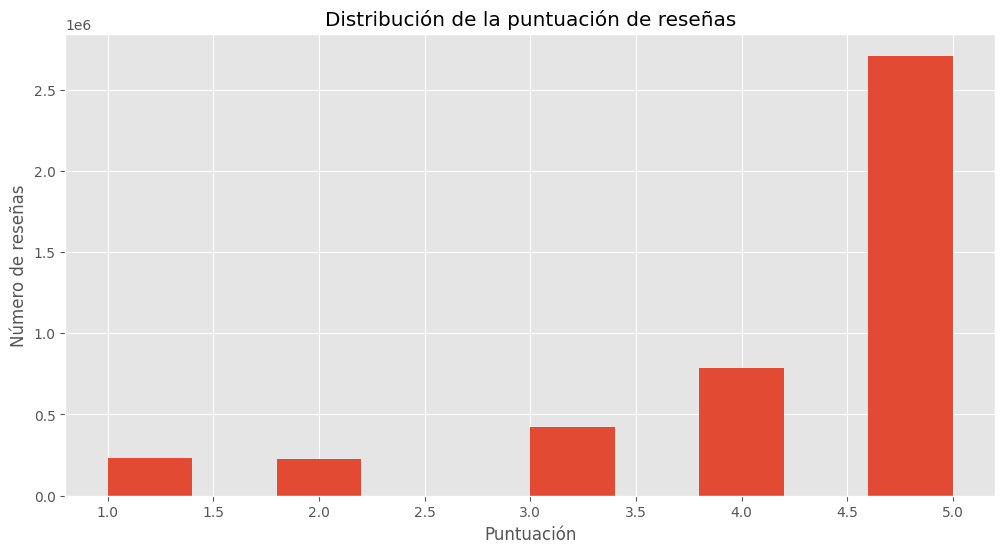

In [34]:
# 4. Visualizaciones

# Histogramas para distribución de variables numéricas
data['overall'].hist()
plt.title('Distribución de la puntuación de reseñas')
plt.xlabel('Puntuación')
plt.ylabel('Número de reseñas')
plt.show()

<ipython-input-35-968a3152df45>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


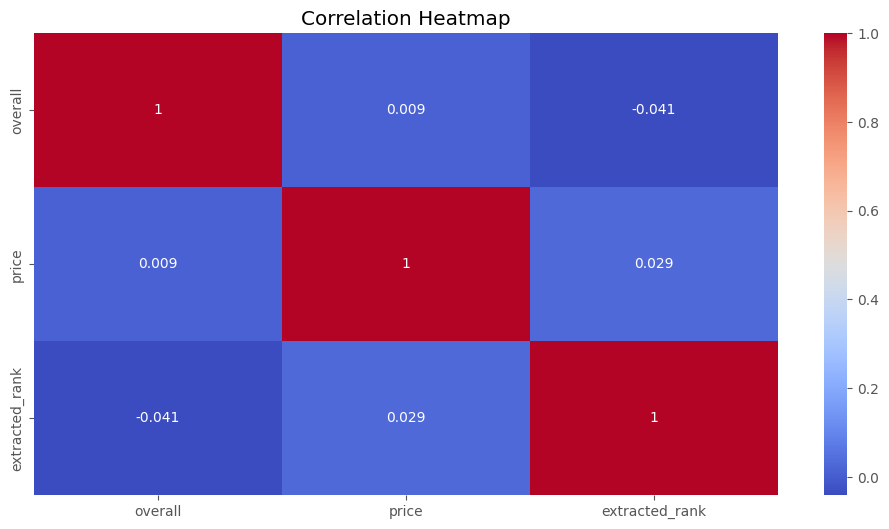

In [35]:
# Matriz de correlación y mapa de calor
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

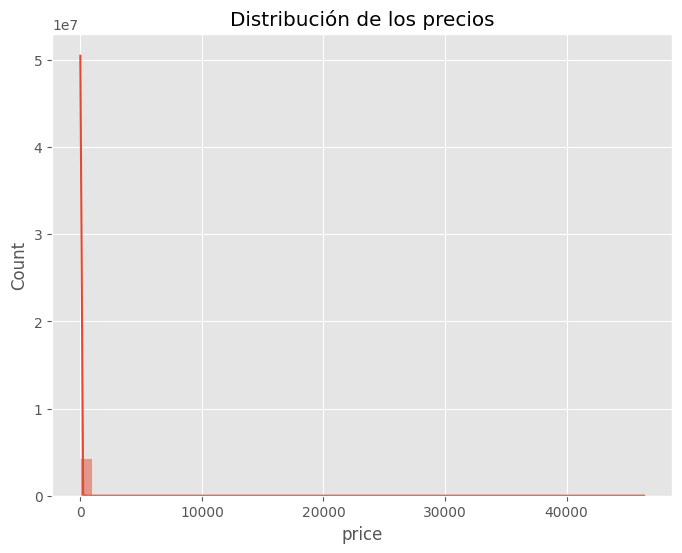

In [39]:
# Distribución de los precios
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='price', bins=50, kde=True)
plt.title('Distribución de los precios')
plt.show()

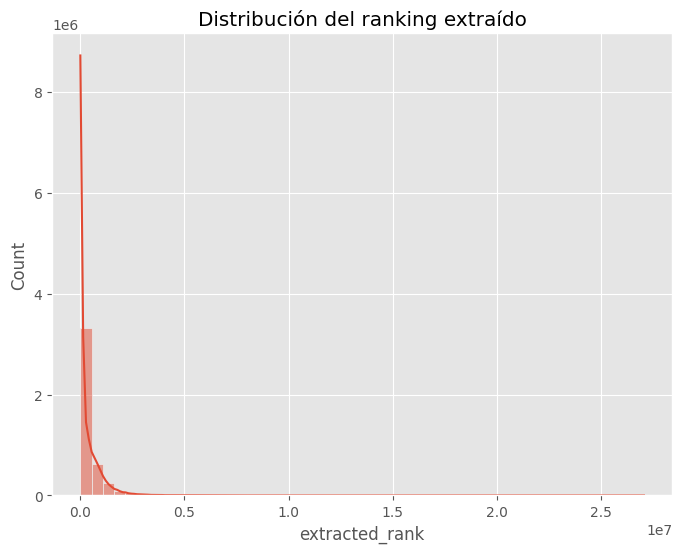

In [40]:
# Distribución del ranking extraído
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='extracted_rank', bins=50, kde=True)
plt.title('Distribución del ranking extraído')
plt.show()

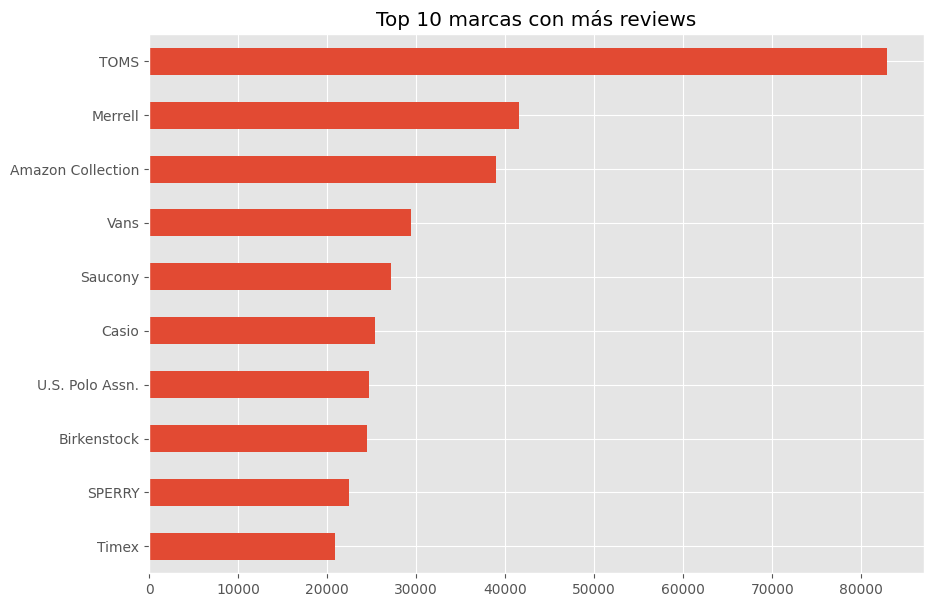

In [41]:
# Top 10 marcas con más reviews
plt.figure(figsize=(10, 7))
data['brand'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 marcas con más reviews')
plt.gca().invert_yaxis()
plt.show()

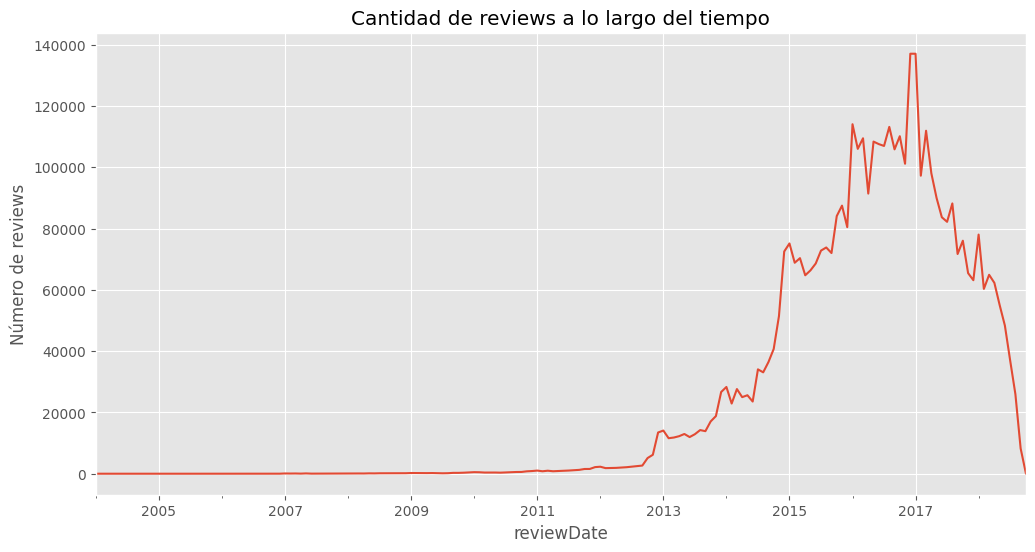

In [42]:
# Serie temporal de reviews por fecha
plt.figure(figsize=(12, 6))
data.resample('M', on='reviewDate').size().plot()
plt.title('Cantidad de reviews a lo largo del tiempo')
plt.ylabel('Número de reviews')
plt.show()

<ipython-input-43-3cd6aa8e9672>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


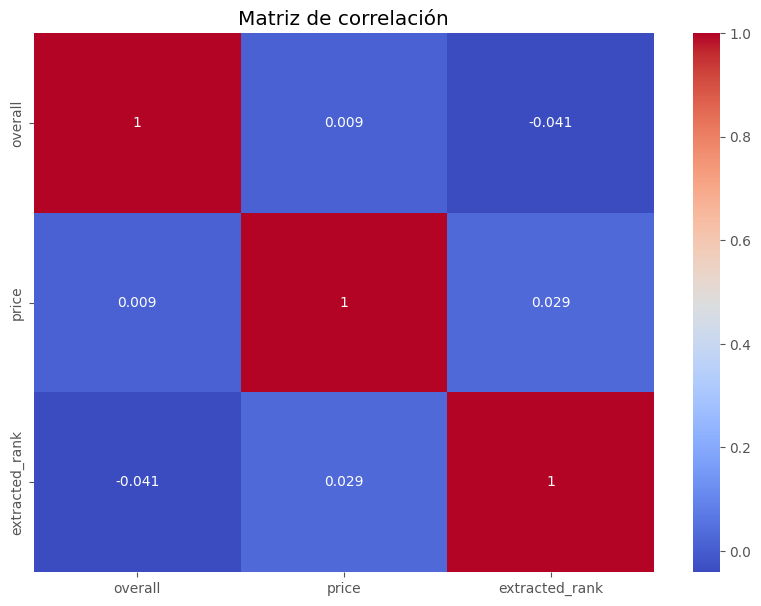

In [43]:
# 8. Matriz de correlación (útil para variables numéricas)
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()